# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Sabila Nadia Islamia
- **Email:** m131d4kx2831@bangkit.academy
- **ID Dicoding:**  M131D4KX2831

## Menentukan Pertanyaan Bisnis

- Bagaimana performa persewaan sepeda dalam periode tahun-an? 
- Pada musim apa jumlah sewa mendapat order terbanyak dalam periode tahun-an?
- Apakah ada pola berdasarkan bulan dan jam dalam jumlah sewa sepeda harian?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Tahap data wrangling, dimulai dengan proses pengumpulan data. Pada proses ini terdapat 2 data/table yang digunakan yaitu ***table day*** dan ***table hour***.

#### Load Table Day

In [2]:
day_df = pd.read_csv("https://raw.githubusercontent.com/SabilaNadia02/bike-sharing/main/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Load Table Hour

In [3]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/SabilaNadia02/bike-sharing/main/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Proses selanjutnya ialah penilaian terhadap data tersebut. Proses ini bertujuan untuk mengidentifikasi berbagai masalah yang terdapat dalam data, seperti missing value, unstandard value, dll.

#### Assessing Data day_df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


***Keterangan :*** 
- Jumlah data pada day_df telah lengkap atau dengan kata lain tidak ada missing value ataupun duplicate value di dalamnya
- Terdapat kesalahan tipe data untuk kolom dteday. Kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object
- Untuk memudahkan proses exploratory dan explanatory data, beberapa tipe data perlu di ubah untuk merepresentasikan value sesungguhnya

#### Assessing Data hour_df

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


***Keterangan :*** 
- Jumlah data pada hour_df telah lengkap atau dengan kata lain tidak ada missing value ataupun duplicate value di dalamnya
- Terdapat kesalahan tipe data untuk kolom dteday. Kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object
- Untuk memudahkan proses exploratory dan explanatory data, beberapa tipe data perlu di ubah untuk merepresentasikan value sesungguhnya

### Cleaning Data

#### Cleaning Data - Data day_df

In [12]:
# Mengubah tipe data menjadi date-time (mencoba menggunakan perulangan)

datetime_columns = ["dteday"]
 
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [14]:
# Mengubah tipe data (mencoba menggunakan fungsi pandas : astype() )

day_df['season'] = day_df.season.astype('category')
day_df['mnth'] = day_df.mnth.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weathersit'] = day_df.weathersit.astype('category')

In [15]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(6), datetime64

***Keterangan :*** Untuk memudahkan proses pengamatan dan pemahaman pada proses ekploratory, explanatory dan visualization data, nama kolom dan nilai akan di rubah berdasarkan penjelasan pada tiap-tiap kriteria.

In [16]:
# Data semula
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [17]:
# Konversi nilai untuk kolom season
day_df['season'] = day_df['season'].cat.rename_categories({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

# Konversi nilai untuk kolom yr
day_df['yr'] = day_df['yr'].replace({0: 2011, 1: 2012})

# Konversi nilai untuk kolom mnth
day_df['mnth'] = day_df['mnth'].cat.rename_categories({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

# Konversi nilai untuk kolom weathersit
day_df['weathersit'] = day_df['weathersit'].cat.rename_categories({1: 'Clear', 2: 'Misty', 3: 'Light_RainSnow', 4: 'Heavy_RainSnow'})

# Konversi nilai untuk kolom weekday
day_df['weekday'] = day_df['weekday'].cat.rename_categories({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})

# Konversi nilai untuk kolom workingday
day_df['workingday'] = day_df['workingday'].cat.rename_categories({0: 'No', 1: 'Yes'})

In [18]:
# Data saat ini
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,Jan,0,Saturday,No,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Winter,2011,Jan,0,Sunday,No,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Winter,2011,Jan,0,Monday,Yes,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Winter,2011,Jan,0,Tuesday,Yes,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Winter,2011,Jan,0,Wednesday,Yes,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [19]:
# Merubah nama kolom

day_df.rename(columns={
    "dteday" : "date",
    "yr" : "year",
    "mnth" : "month",
    "weathersit" : "weather",
    "hum" : "humidity",
    "cnt" : "total_count"}, inplace=True
)
day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,Winter,2011,Jan,0,Saturday,No,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Winter,2011,Jan,0,Sunday,No,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Winter,2011,Jan,0,Monday,Yes,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Winter,2011,Jan,0,Tuesday,Yes,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Winter,2011,Jan,0,Wednesday,Yes,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Proses yang terakhir adalah merubah nilai pada kolom 'temp', 'atemp', 'humidity, 'windspeed' ke dalam nilai yang belum dinormalisasi agar memudahkan dalam proses exploratory dan gaining insight.

In [20]:
# Merubah nilai dari 'temp', 'atemp', 'humidity, 'windspeed' ke dalam nilai yang belum dinormalisasi

day_df['temp'] = day_df['temp']*41
day_df['atemp'] = day_df['atemp']*50
day_df['humidity'] = day_df['humidity']*100
day_df['windspeed'] = day_df['windspeed']*67

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


***Proses cleaning data pada day_df telah selesai.*** Merangkum proses yang dilakukan pada cleaning data sebagai berikut:
1. Mengganti tipe data dteday yang semula object menjadi datetime
2. Mengonversi nilai pada setiap kolom yang semulai sebuah tipe data int (yang merepresentasikan data/kondisi tertentu) menjadi data asli
3. Mengganti nama kolom agar mudah di pahami
4. Merubah nilai pada kolom 'temp', 'atemp', 'humidity, 'windspeed' ke dalam nilai yang belum dinormalisasi

Kini data siap di eksplorasi.

#### Cleaning Data - Data day_df

In [21]:
# Mengubah tipe data menjadi date-time (mencoba menggunakan perulangan)

datetime_columns = ["dteday"]
 
for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [22]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [23]:
# Mengubah tipe data (mencoba menggunakan fungsi pandas : astype() )

hour_df['season'] = hour_df.season.astype('category')
hour_df['mnth'] = hour_df.mnth.astype('category')
hour_df['holiday'] = hour_df.holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['workingday'] = hour_df.workingday.astype('category')
hour_df['weathersit'] = hour_df.weathersit.astype('category')

In [24]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

***Keterangan :*** Untuk memudahkan proses pengamatan dan pemahaman pada proses ekploratory, explanatory dan visualization data, nama kolom dan nilai akan di rubah berdasarkan penjelasan pada tiap-tiap kriteria.

In [25]:
# Data semula
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [26]:
# Konversi nilai untuk kolom season
hour_df['season'] = hour_df['season'].cat.rename_categories({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

# Konversi nilai untuk kolom yr
hour_df['yr'] = hour_df['yr'].replace({0: 2011, 1: 2012})

# Konversi nilai untuk kolom mnth
hour_df['mnth'] = hour_df['mnth'].cat.rename_categories({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

# Konversi nilai untuk kolom weathersit
hour_df['weathersit'] = hour_df['weathersit'].cat.rename_categories({1: 'Clear', 2: 'Misty', 3: 'Light_RainSnow', 4: 'Heavy_RainSnow'})

# Konversi nilai untuk kolom weekday
hour_df['weekday'] = hour_df['weekday'].cat.rename_categories({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})

# Konversi nilai untuk kolom workingday
hour_df['workingday'] = hour_df['workingday'].cat.rename_categories({0: 'No', 1: 'Yes'})

In [27]:
# Data saat ini
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,Jan,0,0,Saturday,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,Jan,1,0,Saturday,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,2011,Jan,2,0,Saturday,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,2011,Jan,3,0,Saturday,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,2011,Jan,4,0,Saturday,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [28]:
# Merubah nama kolom

hour_df.rename(columns={
    "dteday" : "date",
    "yr" : "year",
    "mnth" : "month",
    "weathersit" : "weather",
    "hum" : "humidity",
    "cnt" : "total_count"}, inplace=True
)
hour_df.head()

,instant,date,season,year,month,hr,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,Winter,2011,Jan,0,0,Saturday,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,Jan,1,0,Saturday,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,2011,Jan,2,0,Saturday,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,2011,Jan,3,0,Saturday,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,2011,Jan,4,0,Saturday,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


Proses yang terakhir adalah merubah nilai pada kolom 'temp', 'atemp', 'humidity, 'windspeed' ke dalam nilai yang belum dinormalisasi agar memudahkan dalam proses exploratory dan gaining insight.

In [29]:
# Merubah nilai dari 'temp', 'atemp', 'humidity, 'windspeed' ke dalam nilai yang belum dinormalisasi

hour_df['temp'] = hour_df['temp']*41
hour_df['atemp'] = hour_df['atemp']*50
hour_df['humidity'] = hour_df['humidity']*100
hour_df['windspeed'] = hour_df['windspeed']*67

hour_df.head()

,instant,date,season,year,month,hr,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,Winter,2011,Jan,0,0,Saturday,No,Clear,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Winter,2011,Jan,1,0,Saturday,No,Clear,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Winter,2011,Jan,2,0,Saturday,No,Clear,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,Winter,2011,Jan,3,0,Saturday,No,Clear,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,Winter,2011,Jan,4,0,Saturday,No,Clear,9.84,14.395,75.0,0.0,0,1,1


***Proses cleaning data pada hour_df telah selesai.*** Merangkum proses yang dilakukan pada cleaning data sebagai berikut:
1. Mengganti tipe data dteday yang semula object menjadi datetime
2. Mengonversi nilai pada setiap kolom yang semulai sebuah tipe data int (yang merepresentasikan data/kondisi tertentu) menjadi data asli
3. Mengganti nama kolom agar mudah di pahami
4. Merubah nilai pada kolom 'temp', 'atemp', 'humidity, 'windspeed' ke dalam nilai yang belum dinormalisasi

Kini data siap di eksplorasi.

## Exploratory Data Analysis (EDA)

### Explore ...

#### Mencari rata-rata jumlah penyewa sepeda harian (berdasarkan hari)

In [30]:
day_df.groupby('weekday', observed=True)['total_count'].mean().reset_index().sort_values("total_count", ascending=False)

,weekday,total_count
5,Friday,4690.288462
4,Thursday,4667.259615
6,Saturday,4550.542857
3,Wednesday,4548.538462
2,Tuesday,4510.663462
1,Monday,4338.123810
0,Sunday,4228.828571


Berdasarkan table, terlihat bahwa rata-rata penyewa sepeda paling banyak terjadi pada hari **Jumat** dengan **4690 penyewa**, sedangkan rata-rata penyewa sepeda paling sedikit terjadi pada hari **Minggu** dengan **4228 penyewa**. 

Data tersebut memberikan gambaran tentang pola peminjaman sepeda dalam seminggu, dimana Jumat mungkin menjadi hari yang paling populer bagi kebanyakan orang untuk menggunakan layanan penyewaan sepeda, sementara Minggu mungkin sedikit lebih tenang.

#### Mencari rata-rata penyewa jumlah sepeda pada hari masuk kerja (1: masuk, 0: akhir pekan/libur) (berdasarkan hari)

In [31]:
day_df.groupby('workingday', observed=True)['total_count'].mean().reset_index().sort_values("total_count", ascending=False)

,workingday,total_count
1,Yes,4584.820000
0,No,4330.168831


Berdasarkan table, jumlah rata-rata penyewa sepeda pada hari masuk kerja lebih banyak dibandingkan dengan jumlah pada hari libur. Jumlah rata-rata tersebut adalah **4584 penyewa pada hari masuk kerja** sementara **4330 penyewa pada hari libur kerja**. 

Ini menunjukkan bahwa layanan penyewaan sepeda cenderung lebih banyak digunakan pada hari kerja dibandingkan dengan hari libur. Hal ini mungkin disebabkan oleh kebutuhan orang untuk bepergian ke tempat kerja atau sekolah, yang dapat menyebabkan peningkatan permintaan untuk transportasi seperti sepeda pada hari kerja.

#### Mencari rata-rata jumlah penyewa sepeda pada saat liburan

In [32]:
day_df.groupby('holiday', observed=True)['total_count'].mean().reset_index().sort_values("total_count", ascending=False)

,holiday,total_count
0,0,4527.104225
1,1,3735.000000


Pada saat liburan jumlah rata-rata penyewa sepeda justru lebih rendah dibandingkan dengan hari biasa (hari masuk kerja/sekolah). Jumlah rata-rata tersebut adalah **4527 penyewa pada hari biasa** dan **3735 penyewa pada saat liburan**. 

Ini menunjukkan bahwa layanan penyewaan sepeda cenderung lebih banyak digunakan pada hari biasa dibandingkan dengan hari libur. Hal ini mungkin disebabkan oleh fakta bahwa pada hari biasa, orang lebih aktif dan mungkin memiliki kegiatan yang memerlukan transportasi, sementara pada hari libur, kegiatan mungkin lebih santai atau berbeda dari rutinitas harian sehingga permintaan untuk penyewaan sepeda lebih rendah.

#### Menghitung jumlah penyewa pada hari kerja berdasarkan musim

In [33]:
day_df.groupby(by="season", observed=True).agg({
    "workingday": "count", 
    "temp": ["max", "min", "mean"],
    "windspeed": ["max", "min", "mean"],
    "humidity": ["max", "min", "mean"]
}).sort_values(by=("workingday", "count"), ascending=False)

workingday       temp                        windspeed            \
            count        max        min       mean        max       min   
season                                                                    
Summer        188  35.328347  19.235847  28.958682  25.166339  4.292744   
Spring        184  33.141653  10.374763  22.320611  26.000489  4.417256   
Winter        181  23.472500   2.424346  12.207650  34.000021  3.042356   
Fall          178  26.957500   9.054153  17.339148  28.292425  1.500244   

                  humidity                      
             mean      max      min       mean  
season                                          
Summer  11.530366  93.9565  36.0000  63.348206  
Spring  13.634978  92.2500  25.4167  62.694833  
Winter  14.373984  94.8261   0.0000  58.290291  
Fall    11.523637  97.2500  33.3478  66.871917

Berdasarkan tabel terlihat bagaimana faktor-faktor musim memengaruhi perilaku penyewaan/penggunaan sepeda pada hari kerja. 
- Jumlah penyewa sepeda paling banyak adalah pada musim panas dengan 188 penyewa.
- Rata-rata suhu juga berpengaruh pada perilaku penyewaan, suhu yang sangat rendah bisa membuat bersepeda tidak nyaman atau bahkan berbahaya jika terlalu dingin, sementara suhu yang sangat tinggi bisa membuat bersepeda tidak menyenangkan karena risiko kelelahan atau dehidrasi. Pada rata-rata suhu di setiap musim di dalam tabel tersebut, rata-rata suhu musim panas cenderung tidak terlalu ekstrim (28°C) di bandingkan dengan rata-rata suhu di musim lainnya. Suhu tersebut masih tergolong nyaman untuk bersepeda.
- Kemudian kecepatan angin, biasanya kecepatan angin lebih tinggi terjadi selama musim dingin atau musim semi daripada musim panas. Kecepatan angin yang normal dapat meningkatkan minat untuk bersepeda.
- Terakhir kelembaban. Kelembaban tinggi dapat membuat pengguna merasa tidak nyaman dan berkeringat lebih banyak saat bersepeda. Hal ini dapat mempengaruhi kenyamanan dan keinginan untuk menggunakan sepeda. Kelembaban rendah juga dapat mempengaruhi kenyamanan pernapasan dan kesehatan secara keseluruhan. Dan, rata-rata kelembaban pada musim panas masih tergolong normal sehingga dapat meningkatkan minat untuk bersepeda/menyewa sepeda. 

#### Menghitung jumlah penyewa pada hari kerja berdasarkan cuaca 

In [34]:
day_df.groupby(by="weather", observed=True).agg({
    "workingday": "count", 
    "temp": ["max", "min", "mean"],
    "windspeed": ["max", "min", "mean"],
    "humidity": ["max", "min", "mean"]
}).sort_values(by=("workingday", "count"), ascending=False)

workingday       temp                       windspeed  \
                    count        max       min       mean        max   
weather                                                                
Clear                 463  35.328347  2.424346  20.973200  34.000021   
Misty                 247  33.415000  4.407500  19.284996  27.791600   
Light_RainSnow         21  25.990433  8.917500  17.771046  23.999400   

                                    humidity                      
                     min       mean      max      min       mean  
weather                                                           
Clear           1.500244  12.746926  83.5833  18.7917  56.559439  
Misty           3.167425  12.490863  97.2500  40.7083  72.588678  
Light_RainSnow  6.500394  16.303489  97.0417   0.0000  84.887248

Berdasarkan tabel terlihat bagaimana faktor-faktor cuaca memengaruhi perilaku penyewaan/penggunaan sepeda pada hari kerja.

Jumlah penyewa sepeda paling banyak pada saat cuaca cerah sebanyak 463 penyewa. Kemudian dengan rata-rata suhu 20°C, kecepatan angin normal dan kelembaban yang normaal pula. Cuaca berkabut pada posisi ke-2 dengan 247 penyewa, rata-rata suhu turun menjadi 19C, kecepatan angin yang sama namun kelembaban naik. Peringkat terakhir adalah pada saat cuaca gerimis dengan jumlah 21 penyewa, kemudian suhu turun dan kecepatan angin serta kelembababn naik. 

## Visualization & Explanatory Analysis

### Pertanyaan 1:

### Bagaimana performa persewaan sepeda dalam periode tahun-an? 

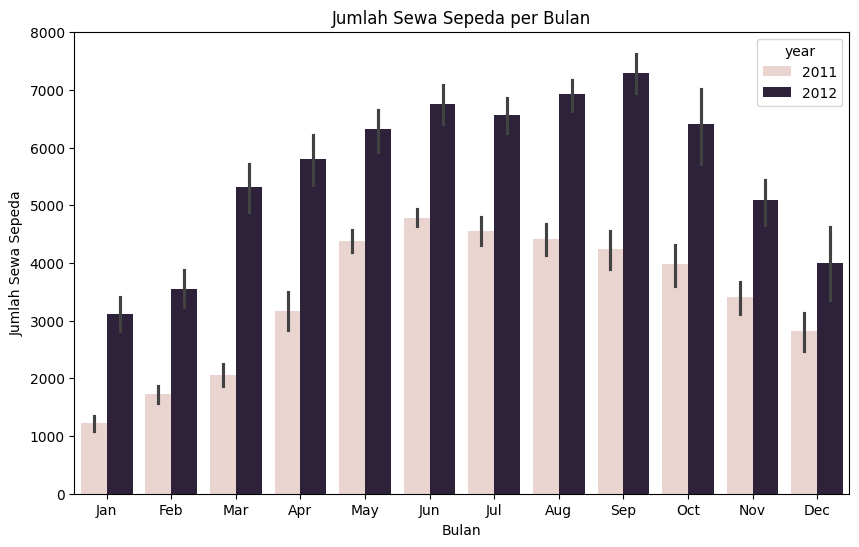

In [35]:
plt.figure(figsize=(10,6))

sns.barplot(x='month', y='total_count', data=day_df, hue='year')

plt.xlabel("Bulan")
plt.ylabel("Jumlah Sewa Sepeda")
plt.title("Jumlah Sewa Sepeda per Bulan")

plt.show()

### Pertanyaan 2:

### Pada musim apa jumlah sewa mendapat order terbanyak dalam periode tahun-an?

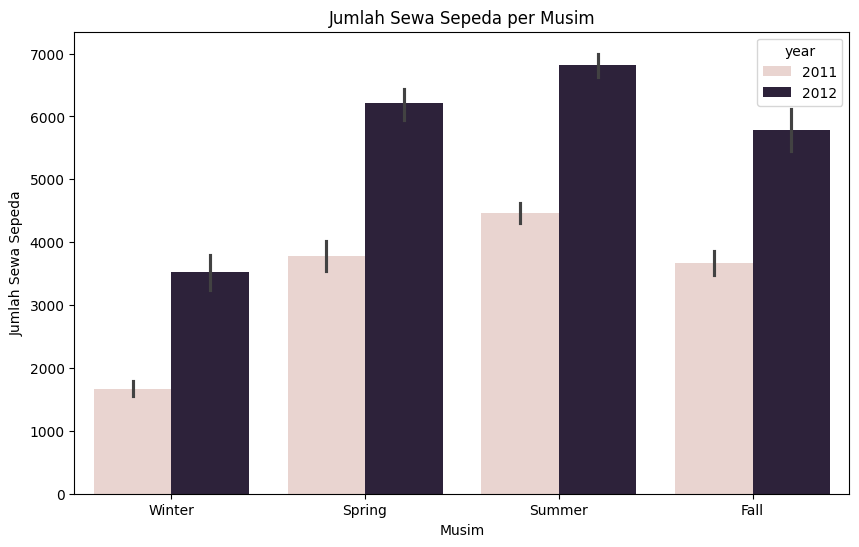

In [36]:
plt.figure(figsize=(10,6))

sns.barplot(x='season', y='total_count', data=day_df, hue='year')

plt.xlabel("Musim")
plt.ylabel("Jumlah Sewa Sepeda")
plt.title("Jumlah Sewa Sepeda per Musim")

plt.show()

### Pertanyaan 3:

### Bagaimana pola penyewaan sepeda berdasarkan bulan dan jam?

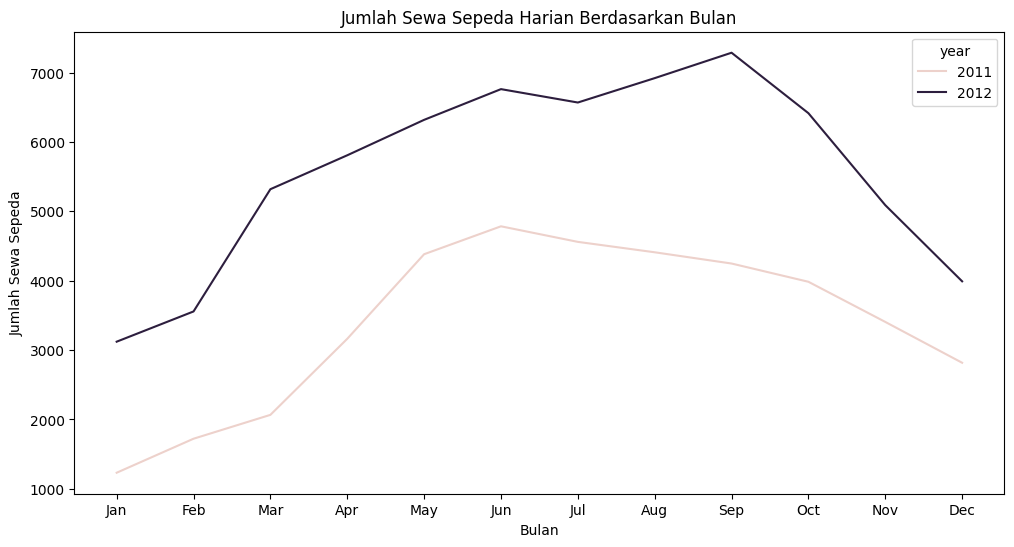

In [37]:
# Berdasarkan Bulan

plt.figure(figsize=(12, 6))
sns.lineplot(x="month", y="total_count", data=day_df, err_style=None, hue='year')
plt.title("Jumlah Sewa Sepeda Harian Berdasarkan Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Sewa Sepeda")
plt.show()

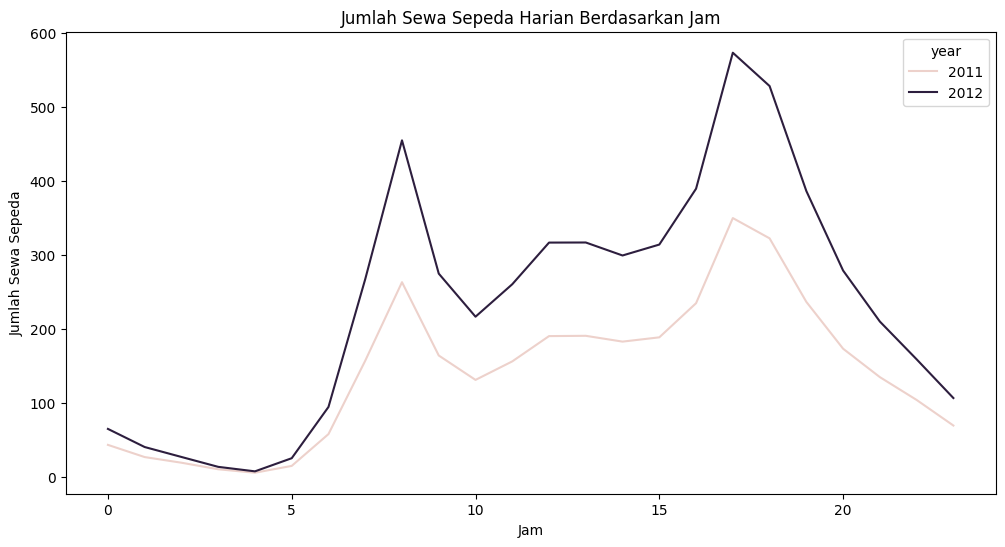

In [38]:
# Berdasarkan Jam

plt.figure(figsize=(12, 6))
sns.lineplot(x="hr", y="total_count", data=hour_df, err_style=None, hue='year')
plt.title("Jumlah Sewa Sepeda Harian Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Sewa Sepeda")
plt.show()

## Conclusion

- **Conclution pertanyaan 1**
  - Jumlah sewa sepeda naik dari tahun 2011 - 2012.
  - Jumlah sewa sepeda terbanyak pada tahun 2011 adalah pada bulan Juni, kemudian pada tahun 2012 jumlah sewa sepeda terbanyak ada pada bulan September.
  - Bulan Januari memiliki jumlah sewa sepeda paling sedikit, baik pada tahun 2011 maupun tahun 2012.
- **Conclution pertanyaan 2**
  - Musim summer (musim panas) memiliki jumlah sewa sepeda tertinggi, baik pada tahun 2011 maupun tahun 2012.
  - Musim winter (musim dingin) memiliki jumlah sewa sepeda paling sedikit, baik pada tahun 2011 maupun tahun 2012.
- **Conclution pertanyaan 3**
   - Berdasarkan bulan, jumlah sewa sepeda terus meningkat pada bulan Maret hingga bulan Juni, kemudian turun pada bulan Juli dan naik kembali pada bulan Agustus hingga September kemudian turun kembali pada bulan October hingga December.
   - Berdasarkan jam, jumlah sewa sepeda paling ramai sekitar pukul 8 pagi dan sekitar pukul 6 sore atau 7 malam.

In [39]:
day_df.to_csv("main_data.csv", index=False)

In [40]:
hour_df.to_csv("main_data2.csv", index=False)